<a href="https://colab.research.google.com/github/zjminglead/BESTORE/blob/master/data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pwd

Mounted at /content/drive
/content


解决中文乱码问题

[解决legend()参考方法](https://www.pythonf.cn/read/108618)

In [ ]:
!wget -O /usr/share/fonts/truetype/liberation/simhei.ttf "https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf"

--2021-09-27 13:29:03--  https://www.wfonts.com/download/data/2014/06/01/simhei/chinese.simhei.ttf
Resolving www.wfonts.com (www.wfonts.com)... 104.225.219.210
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050870 (9.6M) [application/octetstream]
Saving to: ‘/usr/share/fonts/truetype/liberation/simhei.ttf’

/usr/share/fonts/tr 100%[===================>]   9.58M  36.8MB/s    in 0.3s    

2021-09-27 13:29:03 (36.8 MB/s) - ‘/usr/share/fonts/truetype/liberation/simhei.ttf’ saved [10050870/10050870]



In [ ]:
 import matplotlib.pyplot as plt
 import matplotlib as mpl
 zhfont = mpl.font_manager.FontProperties(fname='/usr/share/fonts/truetype/liberation/simhei.ttf')
 plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [ ]:
from matplotlib.font_manager import _rebuild

_rebuild() #reload一下

# 数据可视化

# 数据可视化流程

## 1. 整理数据

## 2.明确目的

## 3.寻找合适的表现形式

# 图标的基本组成元素

* 画布
* 坐标系
* 坐标轴
* 坐标轴标题
* 图表标题
* 数据标签
* 数据表
* 网格线
* 图例
* 误差线


# Excel与Python可视化

# 建立画布和坐标系

## 1.建立画布

- 在开始正式的画布建立之前，要先把需要用的库加载进来
- 在Python中可视化用的库是matplotlib库。
- 除了导入matplotlib库，还要多加三行代码，这样图表才能正常显示
- 需要注意的一点就是，建立画布以后画布并不会直接显示出来，只会输出一串画布相关信息的代码。

In [ ]:
# 导入matplotlib库中的pyplot并起名为plt
import matplotlib.pyplot as plt
# 让图标直接在Jupyter Notebook上显示
%matplotlib inline
# 解决中文乱码的问题
plt.rcParams["font.sans-serif"] = 'SimHei'
# 解决负号无法正常显示的问题
plt.rcParams["axes.unicode_minus"] = False

在默认设置下 matplotlib 做出来的图表不是很清晰，这个时候可以将图表设置成矢量图格式显示，这样看起来就会很清晰了，因此要在上面的代码块中加一行代码

In [ ]:
%config InlineBackend.figure_format = 'svg'

导入需要的库以后就可以正式开始建立画布了。

In [ ]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

plt.figure里面有一个参数figsize，它用width和height来控制整块画布的宽和高。

In [ ]:
# 建立宽为8，高为6的画布
plt.figure(figsize=(8, 6))

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

以上合成表达

In [ ]:
fig = plt.figure(figsize=(8,6))

<Figure size 576x432 with 0 Axes>

## 2.建立坐标系

### 用add_subplot函数建立坐标系

- 利用add_subplot函数建立坐标系时**需要先有画布，再在画布上绘**制坐标系。

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


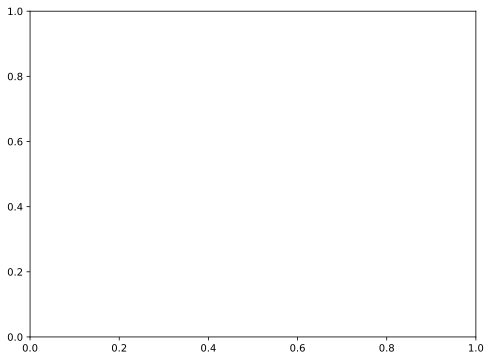

In [ ]:
# 在画布fig上绘制1×1个坐标系，并且把坐标系赋值给变量ax1
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(1,1,1)

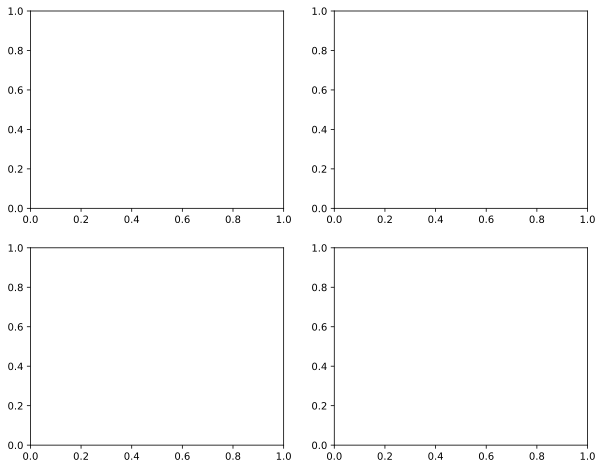

In [ ]:
# 在画布fig上同时绘制2×2个坐标，即4个坐标系
# 并且把第一个坐标系赋值给变量ax1；
# 第二个坐标系赋值给ax2；
# 第三个坐标系赋值给ax3；
# 第四个坐标系赋值给ax4

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

### 用**plt.subplot2grid**函数建立坐标系

- 用plt.subplot2grid函数建立坐标系时**不需要先建立画布**，只需要导入plt库即可。导入plt库以后可以直接调用plt库的subplot2grid方法建立坐标系

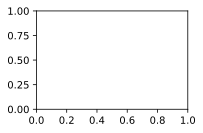

In [ ]:
# 将图表的整个区域分成2行2列，且在(0,0)位置绘图
plt.subplot2grid((2,2),(0,0))

<BarContainer object of 6 artists>

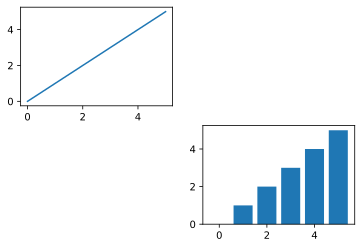

In [ ]:
# 将图表的整个区域分成2行2列，并在(0,0)位置做折线图，在(1,1)位置做柱形图
import numpy as np
x = np.arange(6)
y = np.arange(6)

# 在（0，0）位置做折线图
plt.subplot2grid((2,2), (0,0))
plt.plot(x, y)

# 在（1，1）位置做柱形图
plt.subplot2grid((2,2), (1,1))
plt.bar(x, y)

<BarContainer object of 6 artists>

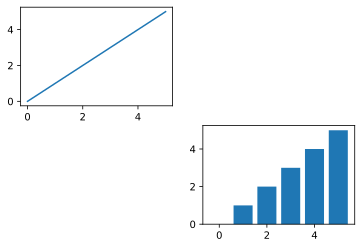

In [ ]:
# 在（0，0）位置做折线图
ax1 = plt.subplot2grid((2,2), (0,0))
ax1.plot(x, y)

# 在（1，1）位置做柱形图
ax2 = plt.subplot2grid((2,2), (1,1))
ax2.bar(x, y)

### 用**plt.subplot**函数建立坐标系

- 与plt.subplot2grid函数类似，plt.subplot也是plt库的一个函数，也表示将区域分成几份，并指明在哪一块区域上绘图

- 两者的区别只是表现形式不一样。

- **不需要先建立画布**

- 用这种方式建立坐标系时同样需要将具体的绘图代码跟在建立坐标系语句后面。

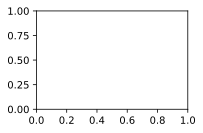

In [ ]:
# 将图表的整个区域分成2行2列，且在第1个坐标系里面绘图
plt.subplot(2,2,1)

<BarContainer object of 6 artists>

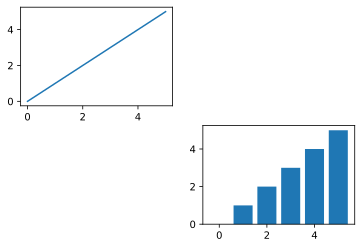

In [ ]:
# 将图表的整个区域分成2行2列，并在第1个坐标系上做折线图，在第4个坐标系上做柱形图
plt.subplot(2,2,1)
plt.plot(x,y)
plt.subplot(2,2,4)
plt.bar(x,y)

### 用**plt.subplots**函数建立坐标系

plt.subplots函数也是plt库的一个函数，它与subplot2grid函数和subplot函数的不同之处是：
  - subplot2grid函数和subplot函数每次只返回一个坐标系，
  - 而subplots函数一次可以返回多个坐标系。
  - 你想在哪个坐标系里面绘图通过axes[x,y]指明即可。



<BarContainer object of 6 artists>

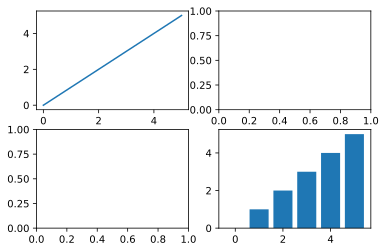

In [ ]:
# 将图表的整个区域分成2行2列，并将4个坐标系全部返回
fig, axes = plt.subplots(2,2)

# 首先在[0,0]坐标系中绘制折线图，然后在[1,1]坐标系中绘制折线图
axes[0,0].plot(x,y)
axes[1,1].bar(x,y)

### 集中创建坐标系方法的区别

- add_subplot 属于对象式编程，所有的操作都是针对某个对象进行的，比如先建立一块画布，然后在这块画布上建立坐标系，进而在坐标系上绘图。

- 而后三种（subplot, subplot2grid, subplots）建立坐标系的方法属于函数式编程，都是直接调用 plt 库里面的某个函数或者方法达到创建坐标系的目的。

- 刚开始的时候多使用对象式编程，当大家对整个绘图原理很熟悉时，再尝试使用函数式编程。

# 设置坐标轴

## 1.设置坐标轴的标题

Text(0, 0.5, '特征重要度')

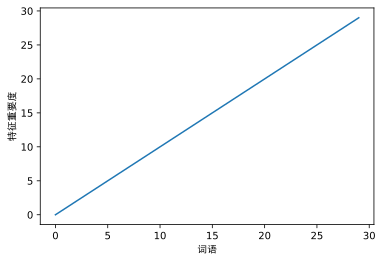

In [ ]:
import numpy as np
x = np.arange(30)
y = np.arange(30)
plt.subplot(1,1,1)
plt.plot(x,y)
plt.xlabel(u'词语', fontproperties=zhfont)
plt.ylabel(u'特征重要度', fontproperties=zhfont)

还可以设置xlabel、ylabel到x轴和y轴的距离，给参数labelpad传入具体的距离数即可

Text(0, 0.5, '注册量')

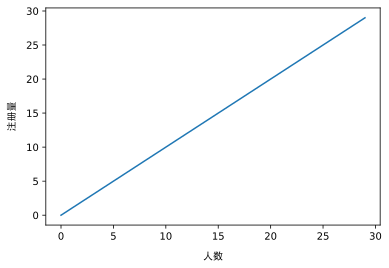

In [ ]:
plt.subplot(1,1,1)
plt.plot(x,y)
plt.xlabel(u"人数", fontproperties = zhfont, labelpad=10)
plt.ylabel(u"注册量", fontproperties = zhfont, labelpad=10)

还可以对 xlabel、ylabel 的文本相关性质进行设置，比如设置字体大小、字体颜色、是否加粗等。为了增加区分度，我们只对xlabel的文本相关性质进行了设置

Text(0, 0.5, '注册量')

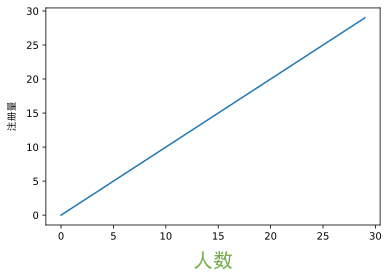

In [ ]:
plt.subplot(1,1,1)
plt.plot(x,y)
plt.xlabel(u"人数", fontproperties = zhfont, 
           fontsize = 20,
           color = "#70AD47",
           fontweight = 'bold',
           labelpad=10)
plt.ylabel(u"注册量", fontproperties = zhfont, labelpad=10)

### 2.设置坐标轴刻度

- 坐标轴刻度设置的第一点就是x轴、y轴每个刻度处显示什么，默认都是显示x/y的值
- 可以自定义显示不同刻度处的值，使用的方法是plt库中的xticks、yticks函数

  - ticks表示刻度值，labels表示该可读出对应的标签
  - plt.xticks(ticks, labels)
  - plt.yticks(ticks, labels)
  - xticks、yticks中的labels也支持文本相关的性质设置，与xlabel、ylabel的文本相关性质设置方式一致。

- 除了xticks、yticks方法，还可以使用plt库中tick_params函数对轴刻度线进行设置。
  - plt.tick_params(axis, reset, which, direction, length, width, color, pad, labelsize, labelcolor, bottom, top, left, right, labelbottom, labeltop, labelleft, labelright)

  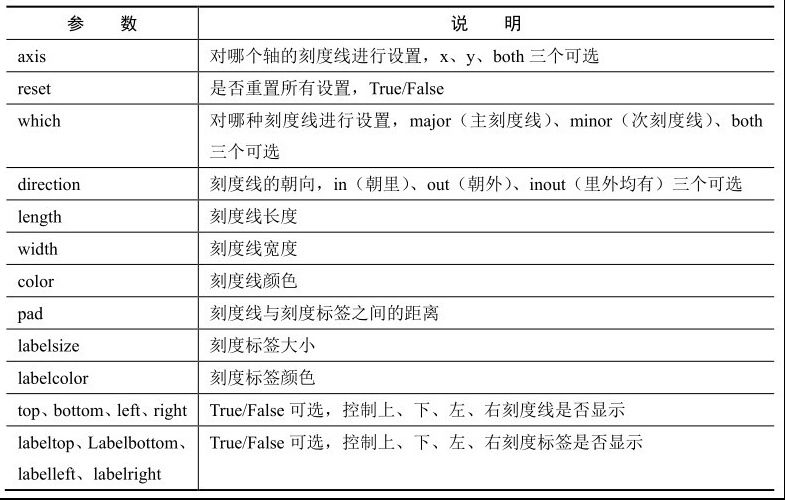


([<matplotlib.axis.YTick at 0x7f0a72b79190>,
 [Text(0, 0, '1000人'),
  Text(0, 0, '2000人'),
  Text(0, 0, '3000人'),
  Text(0, 0, '4000人'),
  Text(0, 0, '5000人'),
  Text(0, 0, '6000人')])

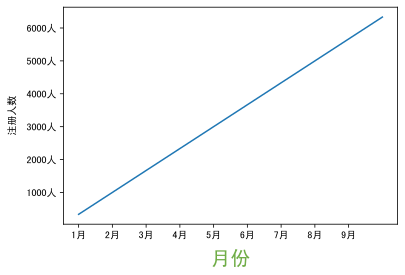

In [ ]:
# 把图表中x轴的刻度值均定义成月份，y轴的刻度值均定义成人数
x = np.arange(10)
y = np.arange(10)
plt.subplot(1,1,1)
plt.plot(x,y)

plt.xlabel(u"月份", fontproperties = zhfont, 
           fontsize = 20,
           color = "#70AD47",
           fontweight = 'bold',
           labelpad=10)
plt.ylabel(u"注册人数", fontproperties = zhfont, labelpad=10)

# 设置x的刻度
plt.xticks(np.arange(9),[u"1月",u"2月",u"3月",u"4月",u"5月",u"6月",u"7月",u"8月",u"9月"], fontproperties = zhfont)
# 设置y的刻度
plt.yticks(np.arange(1,10,1.5),[u"1000人",u"2000人",u"3000人",u"4000人",u"5000人",u"6000人"], fontproperties = zhfont)


In [ ]:
print(np.arange(1000,7000,1000))
print(np.arange(9))

[1000 2000 3000 4000 5000 6000]
[0 1 2 3 4 5 6 7 8]


有的时候为了数据安全不会把 x/y 轴的数值具体显示出来，这个时候只需要给xticks、yticks传入一个空列表就可以把x/y轴的数值隐藏起来

([], <a list of 0 Text major ticklabel objects>)

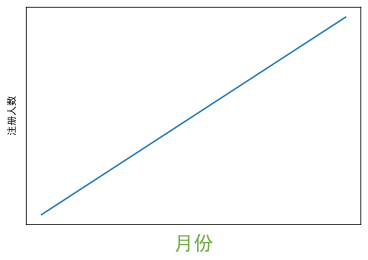

In [ ]:
# 把图表中x轴的刻度值均定义成月份，y轴的刻度值均定义成人数
x = np.arange(10)
y = np.arange(10)
plt.subplot(1,1,1)
plt.plot(x,y)

plt.xlabel(u"月份", fontproperties = zhfont, 
           fontsize = 20,
           color = "#70AD47",
           fontweight = 'bold',
           labelpad=10)
plt.ylabel(u"注册人数", fontproperties = zhfont, labelpad=10)

plt.xticks([])
plt.yticks([])

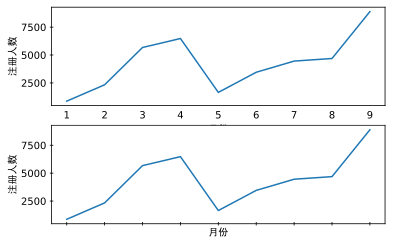

In [ ]:
# 在2×1个坐标系上的第1个坐标系中绘图，
# 轴刻度线设置成双向且下轴刻度线不显示；
# 同时在它的第2个坐标系中绘图，
# 轴刻度线设置成双向且下轴刻度标签不显示

x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([866, 2335, 5677, 6482, 1650, 3456, 4457, 4689, 8890])

# 在2X1的组飙戏上第一个坐标系绘图
plt.subplot(2,1,1)
plt.plot(x,y)
plt.xlabel(u"月份", fontproperties = zhfont)
plt.ylabel(u"注册人数", fontproperties = zhfont)

# 轴刻度线设置成双向且下刻度线不显示
plt.tick_params(axis = "both", which = "both", direction = "inout",bottom = False)

# 在2X1坐标系的第二个坐标系中绘图
plt.subplot(2,1,2)
plt.plot(x,y)
plt.xlabel(u"月份", fontproperties = zhfont)
plt.ylabel(u"注册人数", fontproperties = zhfont)
# 轴刻度线设置成双向且下刻度标签不显示
plt.tick_params(axis = "both", which = "both", direction = "inout", labelbottom = False)

## 3.设置坐标轴的范围

- 坐标轴刻度范围就是设置坐标轴的最大值和最小值
- 把下图表中x轴的刻度范围设置为0~10,y轴的刻度范围设置为0~8000。

(0.0, 9000.0)

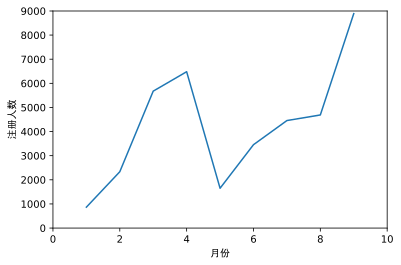

In [ ]:
x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([866, 2335, 5677, 6482, 1650, 3456, 4457, 4689, 8890])

# 在2X1的组飙戏上第一个坐标系绘图
plt.subplot(1,1,1)
plt.plot(x,y)
plt.xlabel(u"月份", fontproperties = zhfont)
plt.ylabel(u"注册人数", fontproperties = zhfont)
plt.xlim(0,10)
plt.ylim(0,9000)

## 4.坐标轴的显示设置

- 有的时候为了美观，会把一些不需要显示的轴关闭，这个时候就可以通过坐标轴的轴显示设置达到目的，坐标轴中的轴默认都是显示出来的，可以通过如下方式进行关闭。

(0.0, 10.0, 0.0, 9000.0)

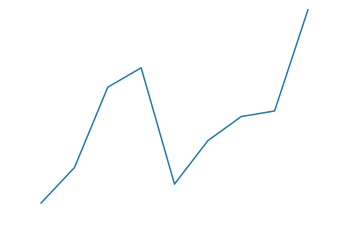

In [ ]:
x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([866, 2335, 5677, 6482, 1650, 3456, 4457, 4689, 8890])

# 在2X1的组飙戏上第一个坐标系绘图
plt.subplot(1,1,1)
plt.plot(x,y)
plt.xlabel(u"月份", fontproperties = zhfont)
plt.ylabel(u"注册人数", fontproperties = zhfont)
plt.xlim(0,10)
plt.ylim(0,9000)
plt.axis("off")

# 其他图表格式

## 1.网格线设置

网格线是相比于坐标轴更小的单位，网格线默认是关闭的，可以通过修改参数b的值，让其等于True来启用网格线。

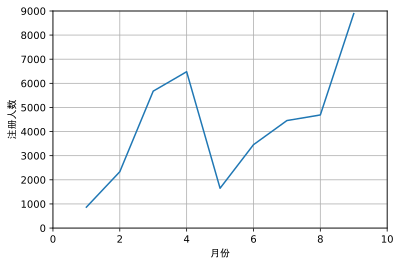

In [ ]:
x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([866, 2335, 5677, 6482, 1650, 3456, 4457, 4689, 8890])

# 在2X1的组飙戏上第一个坐标系绘图
plt.subplot(1,1,1)
plt.plot(x,y)
plt.xlabel(u"月份", fontproperties = zhfont)
plt.ylabel(u"注册人数", fontproperties = zhfont)
plt.xlim(0,10)
plt.ylim(0,9000)
# plt.axis("off")
plt.grid(b = True) # 坐标轴如果关闭了，网格线自然而然没有了

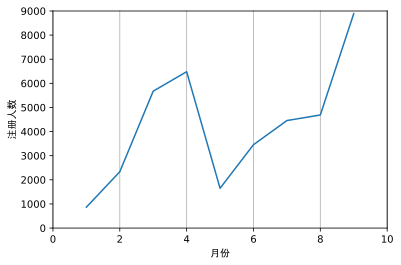

In [ ]:
# 可以通过修改参数axis的值来控制打开哪个轴的网格线。
x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([866, 2335, 5677, 6482, 1650, 3456, 4457, 4689, 8890])

# 在2X1的组飙戏上第一个坐标系绘图
plt.subplot(1,1,1)
plt.plot(x,y)
plt.xlabel(u"月份", fontproperties = zhfont)
plt.ylabel(u"注册人数", fontproperties = zhfont)
plt.xlim(0,10)
plt.ylim(0,9000)
# plt.axis("off")
plt.grid(b = True, axis = "x") # 只打开x轴的网格线

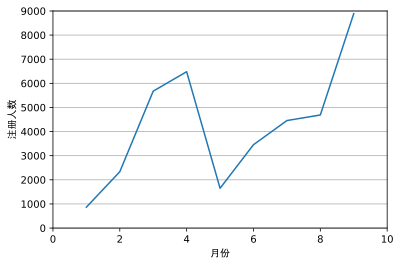

In [ ]:
# 可以通过修改参数axis的值来控制打开哪个轴的网格线。
x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([866, 2335, 5677, 6482, 1650, 3456, 4457, 4689, 8890])

# 在2X1的组飙戏上第一个坐标系绘图
plt.subplot(1,1,1)
plt.plot(x,y)
plt.xlabel(u"月份", fontproperties = zhfont)
plt.ylabel(u"注册人数", fontproperties = zhfont)
plt.xlim(0,10)
plt.ylim(0,9000)
# plt.axis("off")
plt.grid(b = True, axis = "y") # 只打开y轴的网格线

网格线也属于线，所以除了可以设置显示x轴或y轴的，还可以对网格线的线本身进行设置，比如线宽、线型、线的颜色等

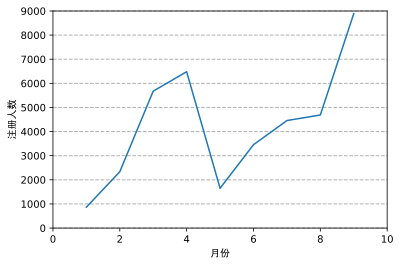

In [ ]:
# 把网格线的线型（linestyle）设置成虚线（dashed），线宽（linewidth）设置为1
# 可以通过修改参数axis的值来控制打开哪个轴的网格线。
x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([866, 2335, 5677, 6482, 1650, 3456, 4457, 4689, 8890])

# 在2X1的组飙戏上第一个坐标系绘图
plt.subplot(1,1,1)
plt.plot(x,y)
plt.xlabel(u"月份", fontproperties = zhfont)
plt.ylabel(u"注册人数", fontproperties = zhfont)
plt.xlim(0,10)
plt.ylim(0,9000)
# plt.axis("off")
plt.grid(b = True, axis = "y", linestyle = "dashed",
         linewidth = 1) # 只打开y轴的网格线

## 2.设置图例

- 图例对图表起到注释作用
- 在绘图的时候通过给 label 参数传入值表示该图表的图例名
- 再通过plt.legend()方法将图例显示出来

**参数修改**

* 还可以通过修改loc参数的参数值来调整图例的显示位置，loc参数的参数值及说明如下表所示。
* 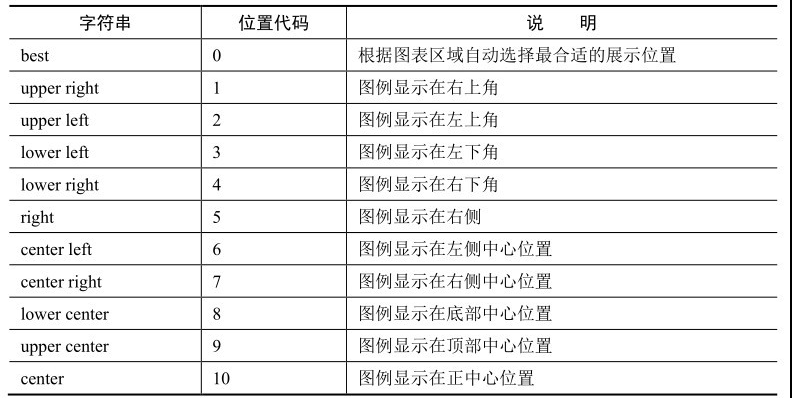


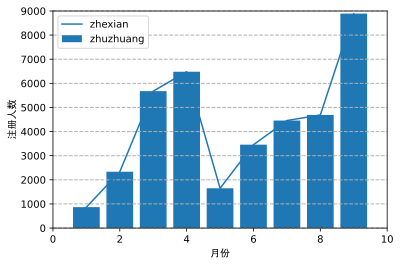

In [ ]:
# 把网格线的线型（linestyle）设置成虚线（dashed），线宽（linewidth）设置为1
# 可以通过修改参数axis的值来控制打开哪个轴的网格线。
x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([866, 2335, 5677, 6482, 1650, 3456, 4457, 4689, 8890])

# 在2X1的组飙戏上第一个坐标系绘图
plt.subplot(1,1,1)
plt.plot(x,y, label = u"zhexian")
plt.bar(x,y, label = u"zhuzhuang")
plt.legend()
plt.xlabel(u"月份", fontproperties = zhfont)
plt.ylabel(u"注册人数", fontproperties = zhfont)
plt.xlim(0,10)
plt.ylim(0,9000)
# plt.axis("off")
plt.grid(b = True, axis = "y", linestyle = "dashed",
         linewidth = 1) # 只打开y轴的网格线


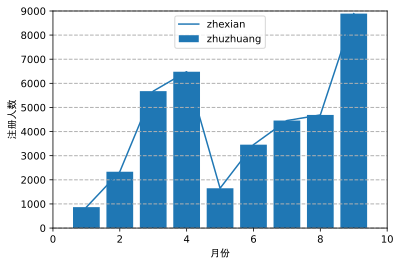

In [ ]:
# 在2X1的组飙戏上第一个坐标系绘图
plt.subplot(1,1,1)
plt.plot(x,y, label = u"zhexian")
plt.bar(x,y, label = u"zhuzhuang")
plt.legend(loc = "upper center")

plt.xlabel(u"月份", fontproperties = zhfont)
plt.ylabel(u"注册人数", fontproperties = zhfont)
plt.xlim(0,10)
plt.ylim(0,9000)
# plt.axis("off")
plt.grid(b = True, axis = "y", linestyle = "dashed",
         linewidth = 1) # 只打开y轴的网格线

- 除了上面几个常用参数，还有一些参数可以设置，参数及说明如下表所示。
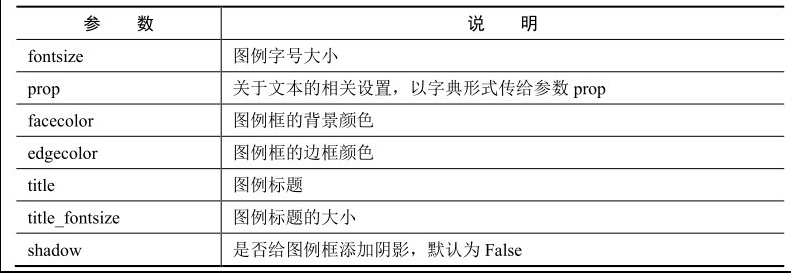

## 3.图表标题设置

- 图表的标题是用来说明整个图表的核心思想的，主要通过如下方式给图表设置标题：
- 

```
plt.title(s = "1-9月公司注册用户数"）
```



Text(0.5, 1.0, '1-9月公司注册用户数')

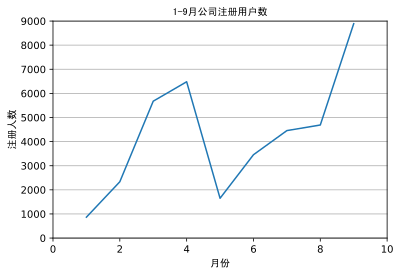

In [ ]:
# 可以通过修改参数axis的值来控制打开哪个轴的网格线。
x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([866, 2335, 5677, 6482, 1650, 3456, 4457, 4689, 8890])

# 在2X1的组飙戏上第一个坐标系绘图
plt.subplot(1,1,1)
plt.plot(x,y)
plt.xlabel(u"月份", fontproperties = zhfont)
plt.ylabel(u"注册人数", fontproperties = zhfont)
plt.xlim(0,10)
plt.ylim(0,9000)
# plt.axis("off")
plt.grid(b = True, axis = "y") # 只打开y轴的网格线
plt.title(u"1-9月公司注册用户数", fontproperties = zhfont)

还可以通过修改**参数loc**的值来修改标题的显示位置，默认都是居中显示的，loc参数值有三个可选

- center
- left
- right

Text(0.0, 1.0, '1-9月公司注册用户数')

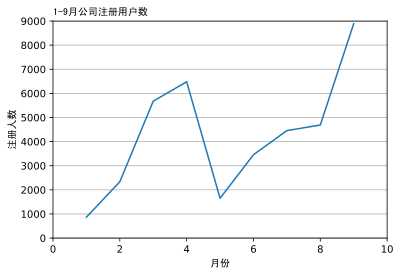

In [ ]:
# 可以通过修改参数axis的值来控制打开哪个轴的网格线。
x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([866, 2335, 5677, 6482, 1650, 3456, 4457, 4689, 8890])

# 在2X1的组飙戏上第一个坐标系绘图
plt.subplot(1,1,1)
plt.plot(x,y)
plt.xlabel(u"月份", fontproperties = zhfont)
plt.ylabel(u"注册人数", fontproperties = zhfont)
plt.xlim(0,10)
plt.ylim(0,9000)
# plt.axis("off")
plt.grid(b = True, axis = "y") # 只打开y轴的网格线
plt.title(u"1-9月公司注册用户数", fontproperties = zhfont, loc = "left")

还可以通过**fontdict参数**对标题文字的相关性质进行设置。

Text(0.5, 1.0, '1-9月公司注册用户数')

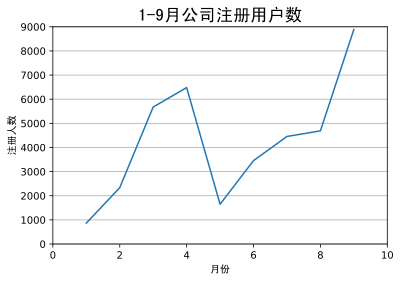

In [ ]:
# 可以通过修改参数axis的值来控制打开哪个轴的网格线。
x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([866, 2335, 5677, 6482, 1650, 3456, 4457, 4689, 8890])

# 在2X1的组飙戏上第一个坐标系绘图
plt.subplot(1,1,1)
plt.plot(x,y)
plt.xlabel(u"月份", fontproperties = zhfont)
plt.ylabel(u"注册人数", fontproperties = zhfont)
plt.xlim(0,10)
plt.ylim(0,9000)
# plt.axis("off")
plt.grid(b = True, axis = "y") # 只打开y轴的网格线
plt.title(u"1-9月公司注册用户数", fontproperties = zhfont, 
          fontsize = 'xx-large', fontweight = 'heavy')

## 4.设置数据标签

- 数据标签实现就是根据坐标值在对应位置显示相应的数值，可以利用text函数实现

- 语法：


```
plt.text(x, y, str, ha, va, fontsize)
```

- 参数说明如下：
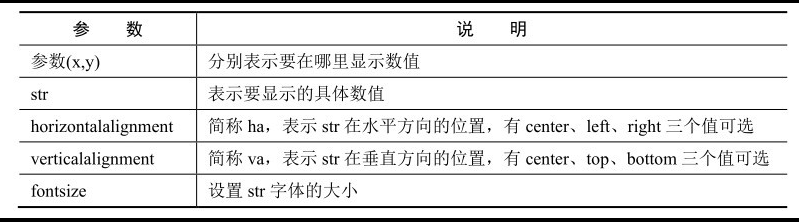


Text(5, 1605, '极值点')

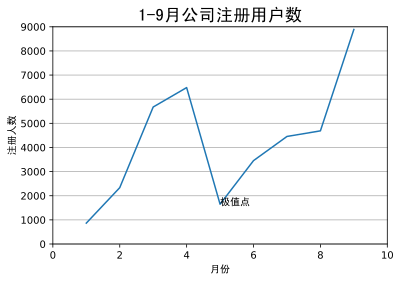

In [ ]:
# 在（5， 1605）处显示该点的y值

# 可以通过修改参数axis的值来控制打开哪个轴的网格线。
x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([866, 2335, 5677, 6482, 1650, 3456, 4457, 4689, 8890])

# 在2X1的组飙戏上第一个坐标系绘图
plt.subplot(1,1,1)
plt.plot(x,y)
plt.xlabel(u"月份", fontproperties = zhfont)
plt.ylabel(u"注册人数", fontproperties = zhfont)
plt.xlim(0,10)
plt.ylim(0,9000)
# plt.axis("off")
plt.grid(b = True, axis = "y") # 只打开y轴的网格线
plt.title(u"1-9月公司注册用户数", fontproperties = zhfont, 
          fontsize = 'xx-large', fontweight = 'heavy')

# 在（5， 1605）处显示该点的y值
plt.text(5, 1605, u"极值点", fontproperties = zhfont)


plt.text函数只是针对坐标轴中的具体某一点(x,y)显示数值str，要想对整个图表显示数据标签，需要利用for进行遍历

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


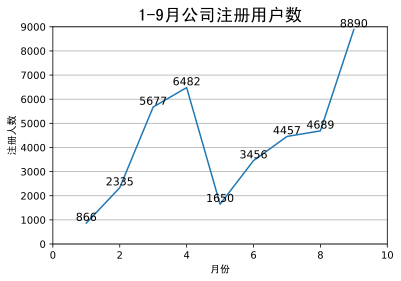

In [ ]:
# 在（5， 1605）处显示该点的y值

# 可以通过修改参数axis的值来控制打开哪个轴的网格线。
x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([866, 2335, 5677, 6482, 1650, 3456, 4457, 4689, 8890])

# 在2X1的组飙戏上第一个坐标系绘图
plt.subplot(1,1,1)
plt.plot(x,y)
plt.xlabel(u"月份", fontproperties = zhfont)
plt.ylabel(u"注册人数", fontproperties = zhfont)
plt.xlim(0,10)
plt.ylim(0,9000)
# plt.axis("off")
plt.grid(b = True, axis = "y") # 只打开y轴的网格线
plt.title(u"1-9月公司注册用户数", fontproperties = zhfont, 
          fontsize = 'xx-large', fontweight = 'heavy')

# 整个图标显示数据标签
for a, b in zip(x,y):
  plt.text(a, b, b, ha = 'center', va = "bottom", fontsize = 11)


## 5.设置图标注释

- 图表注释与数据标签的作用类似，都是便于看图者更快地获取图表信息，实现方法如下：



```
plt.annotate(s, xy, xytest, arrowprops)
```
- 参数说明如下：

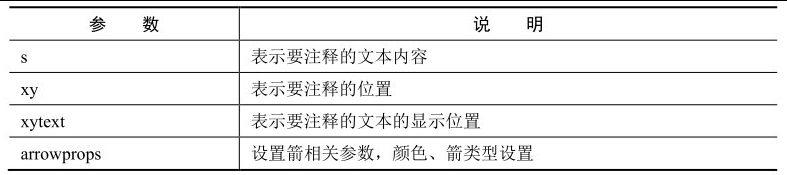


Text(6, 1605, '服务器宕机了')

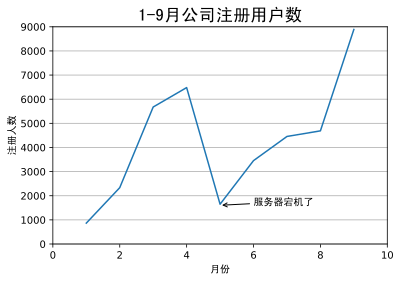

In [ ]:
# 在（5， 1605）处显示该点的y值

# 可以通过修改参数axis的值来控制打开哪个轴的网格线。
x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([866, 2335, 5677, 6482, 1650, 3456, 4457, 4689, 8890])

# 在2X1的组飙戏上第一个坐标系绘图
plt.subplot(1,1,1)
plt.plot(x,y)
plt.xlabel(u"月份", fontproperties = zhfont)
plt.ylabel(u"注册人数", fontproperties = zhfont)
plt.xlim(0,10)
plt.ylim(0,9000)
# plt.axis("off")
plt.grid(b = True, axis = "y") # 只打开y轴的网格线
plt.title(u"1-9月公司注册用户数", fontproperties = zhfont, 
          fontsize = 'xx-large', fontweight = 'heavy')

# 整个图标显示数据标签
# for a, b in zip(x,y):
#   plt.text(a, b, b, ha = 'center', va = "bottom", fontsize = 11)


# facecolor表示箭的颜色，arrowstyle表示箭的类型
plt.annotate(u"服务器宕机了", xy = (5, 1605),
             xytext = (6,1605),
             arrowprops=dict(facecolor='black',
            arrowstyle='->'), fontproperties = zhfont)


## 6.数据表

- 数据表就是在图表基础上再添加一个表格

- 使用的是plt库中的table函数。



```
table(cellText=None, cellColours=None, cellLoc="right", cellWidth="None",
rowLabels=None, rowColours=None, rowLoc='left', colLabels=None, colColours=None, colLoc='center',loc='bottom')
```

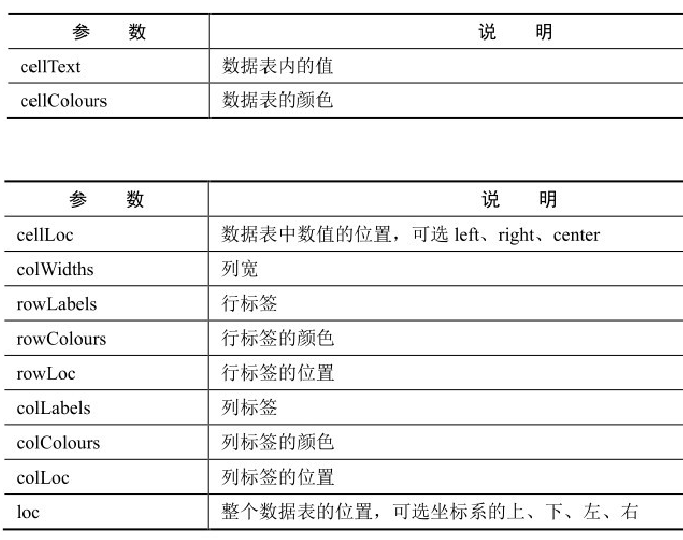





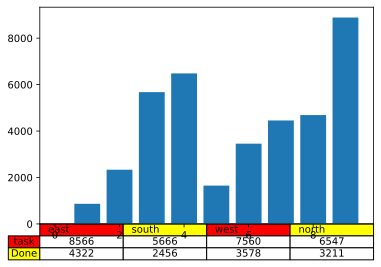

In [ ]:
cellText = [[8566, 5666, 7560, 6547],
       [4322, 2456, 3578, 3211]]
rows = ["task", "Done"]
columns = ["east", "south", "west", "north"]
plt.plot(111)
plt.bar(x,y)
plt.table(cellText=cellText,
          cellLoc = "center",
          rowLabels=rows,
          rowColours = ["red", "yellow"],
          rowLoc = "center",
          colLabels = columns,
          colColours = ["red", "yellow", "red", "yellow"],
          colLoc = 'left',
          loc = 'bottom')

# 常用表的绘制

## 1.折线图绘制
- 折线图常用于表示随着时间的推移某指标的变化趋势，使用的是 plt 库中的 plot方法。

- plot格式



```
# plt.plot(x, y, color, linestyle, linewidth, marker, markeredgecolor, markeredgwidth, markerfacecolor, markersize, label)
```
- 其中，参数x、y分别表示x轴和y轴的数据；color表示折线图的颜色，主要参数值如下表所示。
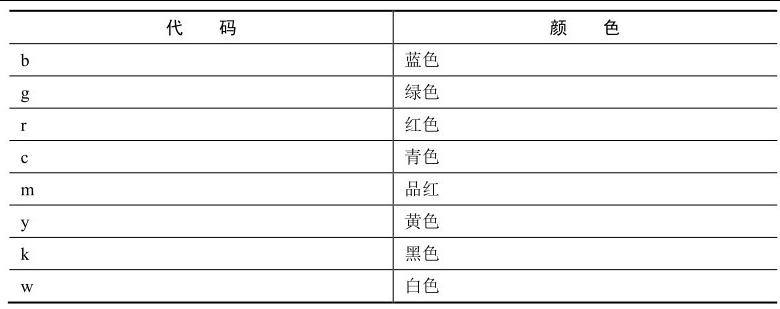







- linestyle表示线的风格，主要参数值如下表所示:

- 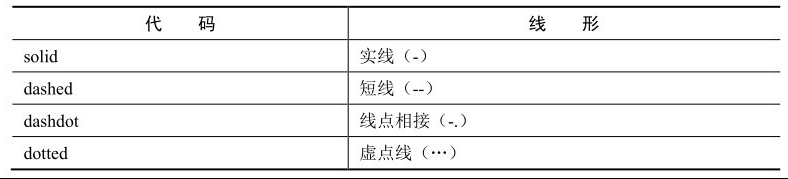

- linewidth表示线的宽度，传入一个表示宽度的浮点数即可。

- marker表示折线图中每点的标记物的形状，主要参数值如下表所示:
- 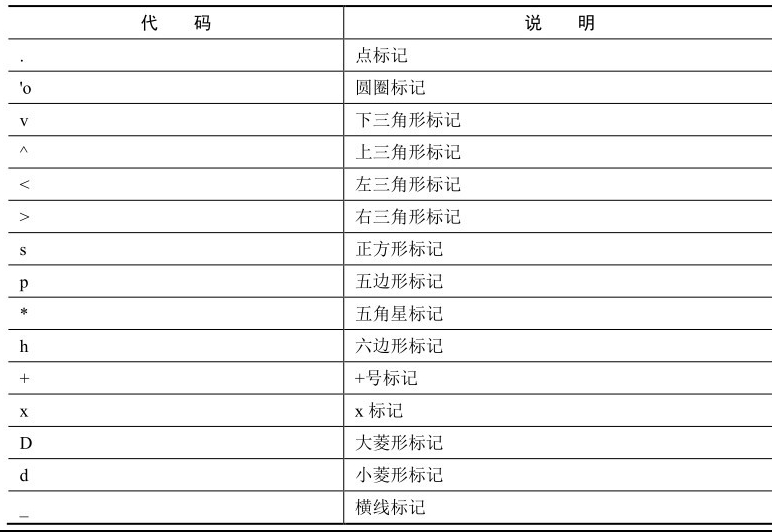





- marker的相关参数说明：
- 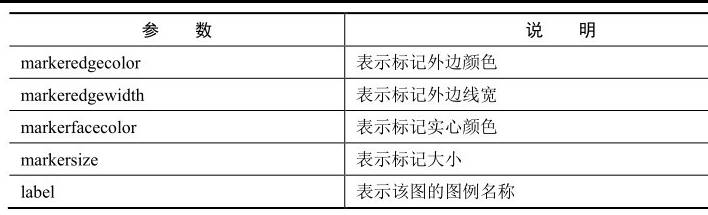

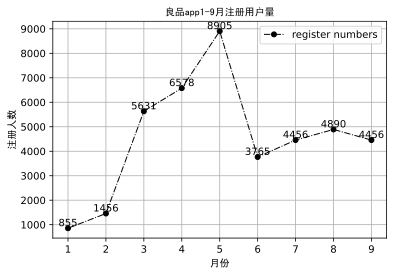

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 建立一个坐标系
plt.subplot(1,1,1)

# 指明x, y值
x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([855, 1456, 5631, 6578, 8905, 3765, 4456, 4890, 4456])

# 绘图
plt.plot(x, y, color='k', linestyle='dashdot', linewidth=1, marker="o", 
         markersize=5, label="register numbers")

# 设置标题
# 标题名及标题的位置
plt.title(u'良品app1-9月注册用户量', loc ="center", fontproperties = zhfont)

# 添加数据标签
for a, b in zip(x,y):
  plt.text(a, b, b, ha='center', va = 'bottom', fontsize = 10)

# 设置网格线
plt.grid(True)

# 设置图例
plt.legend()

# 设置标签
plt.xlabel(u'月份', fontproperties=zhfont)
plt.ylabel(u'注册人数', fontproperties=zhfont)

# 保存图标到本地
plt.savefig("/content/drive/MyDrive/BESTROE/数据/plot.jpg")

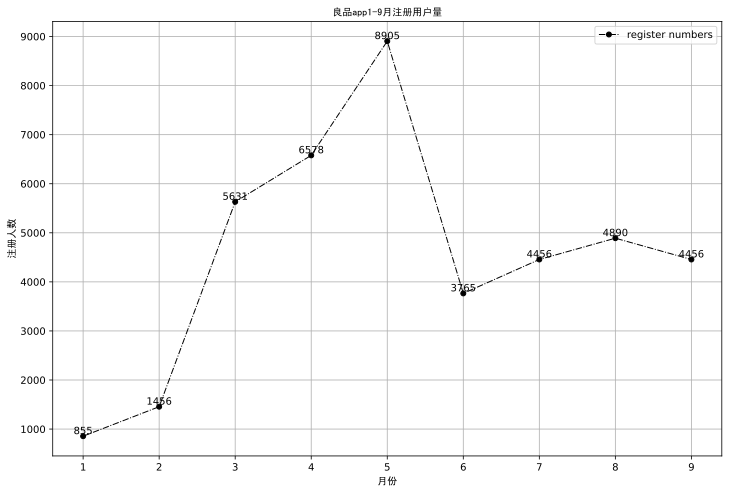

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 建立一个坐标系
fig, axes1 = plt.subplots(1, 1, figsize=(12,8))

# 指明x, y值
x = np.array([1,2,3,4,5,6,7,8,9])
y = np.array([855, 1456, 5631, 6578, 8905, 3765, 4456, 4890, 4456])

# 绘图
axes1.plot(x, y, color='k', linestyle='dashdot', linewidth=1, marker="o", 
         markersize=5, label="register numbers")

# 设置标题
# 标题名及标题的位置
axes1.set_title(u'良品app1-9月注册用户量', loc ="center", fontproperties = zhfont)

# 添加数据标签
for a, b in zip(x,y):
  axes1.text(a, b, b, ha='center', va = 'bottom', fontsize = 10)

# 设置网格线
axes1.grid(True)

# 设置图例
axes1.legend()

# 设置标签
axes1.set_xlabel(u'月份', fontproperties=zhfont)
axes1.set_ylabel(u'注册人数', fontproperties=zhfont)

# 保存图标到本地
plt.savefig("/content/drive/MyDrive/BESTROE/数据/plot.jpg",dpi=400)

总结：这里的ax对象与plt直接函数调用的区别：

[ax&plt](https://cloud.tencent.com/developer/article/1790549)

- 注意ax的对象函数和他还是有区别的

## 2.绘制柱形图

- 柱形图常用于比较不同类别之间的数据情况，使用的是plt库中的bar方法。

- bar的语法


```
plt.bar(x,height, width=0.8, bottom=None, align='center', color, edgecolor)
```
- bar函数的参数说明

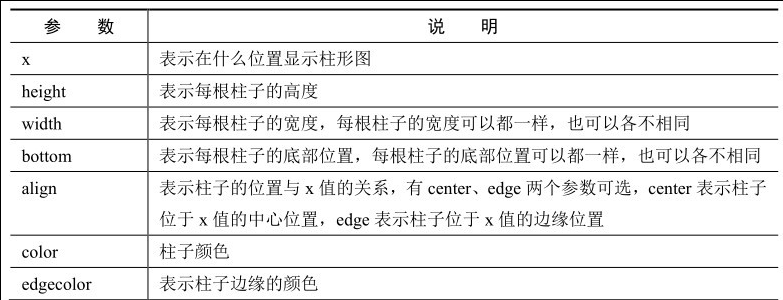





### 普通柱形图

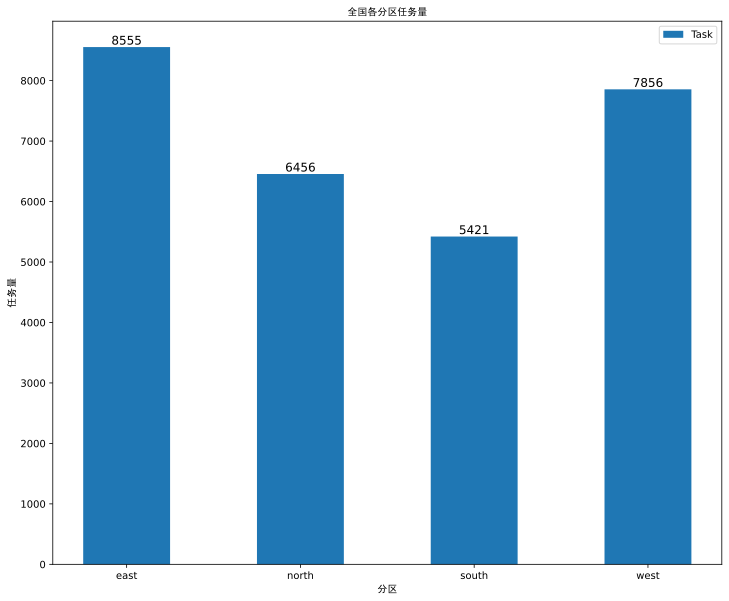

In [ ]:
# 建立一个坐标系

fig, axes = plt.subplots(1, 1, figsize = (12,10))

# 指明 x 和 y 值
x = np.array(['east', 'north', 'south', 'west'])
y = np.array([8555, 6456, 5421, 7856])

#  绘图
axes.bar(x, y, width=0.5, align="center", label ="Task")

#  设置标题
axes.set_title(u"全国各分区任务量", fontproperties=zhfont, loc="center")

#  添加数据标签
for a, b in zip(x, y):
  axes.text(a, b, b, ha ="center", va = "bottom", fontsize =12)

# 设置 x 轴和 y 轴的名称
axes.set_xlabel(u'分区', fontproperties = zhfont)
axes.set_ylabel(u'任务量', fontproperties = zhfont)

# 显示图例
plt.legend()

# 保存图表到本地
plt.savefig("/content/drive/MyDrive/BESTROE/数据/bar.jpg",dpi=400)

### 簇状柱形图

- 簇状柱形图常用来表示不同类别随着同一变量的变化情况，使用的同样是 plt 库中的bar方法，

- 只不过需要调整柱子的显示位置。

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


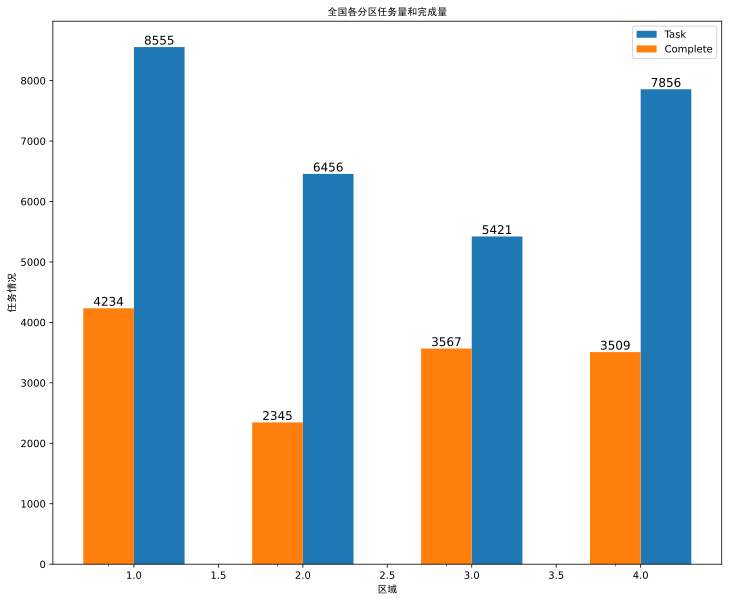

In [ ]:
# 建立一个坐标系

fig, axes = plt.subplots(1, 1, figsize = (12,10))

# 指明 x 和 y 值
x = np.array([1, 2, 3, 4])
y1 = np.array([8555, 6456, 5421, 7856])
y2 = np.array([4234, 2345, 3567, 3509])

# 绘图
axes.bar(x, y1, width=0.3, align= 'edge', label="Task") #柱形图的宽度为0.3
axes.bar(x-0.15, y2, width=0.3, label="Complete") #'x+0.3' 相当于把完成的柱子右移0.3

# 设置标题
axes.set_title(u"全国各分区任务量和完成量", fontproperties = zhfont, loc = 'center')

# 添加数据标签
for a, b in zip(x+0.15, y1):
  axes.text(a, b, b, ha = 'center', va = 'bottom', fontsize = 12)

for a,b in zip(x-0.15, y2):
  axes.text(a, b, b, ha = 'center', va = 'bottom', fontsize = 12)

# 设置 x 轴和 y 轴的名称
axes.set_xlabel(u'区域', fontproperties = zhfont)
axes.set_ylabel(u'任务情况', fontproperties = zhfont)

# 设置 x 轴刻度值
axes.set_xticks(x-0.15, [['east', 'north', 'south', 'west']])

# 设置网格线
axes.grid(False)

# 显示图例
axes.legend()

# 保存本地
plt.savefig("/content/drive/MyDrive/BESTROE/数据/bars.jpg",dpi=400)

### 堆积柱状图

- 堆积柱形图常用来比较同类别各变量和不同类别变量的总和差异，使用的同样是plt库中的bar方法，只要在相同的x位置绘制不同的y,y就会自动叠加。

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


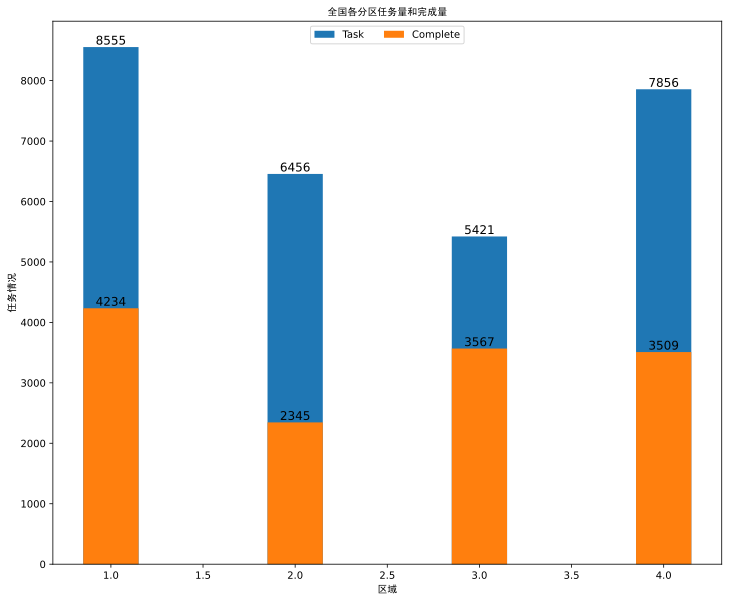

In [ ]:
# 建立一个坐标系

fig, axes = plt.subplots(1, 1, figsize = (12,10))

# 指明 x 和 y 值
x = np.array([1, 2, 3, 4])
y1 = np.array([8555, 6456, 5421, 7856])
y2 = np.array([4234, 2345, 3567, 3509])

# 绘图
axes.bar(x, y1, width=0.3, label="Task") #柱形图的宽度为0.3
axes.bar(x, y2, width=0.3, label="Complete") #'x+0.3' 相当于把完成的柱子右移0.3

# 设置标题
axes.set_title(u"全国各分区任务量和完成量", fontproperties = zhfont, loc = 'center')

# 添加数据标签
for a, b in zip(x, y1):
  axes.text(a, b, b, ha = 'center', va = 'bottom', fontsize = 12)

for a,b in zip(x, y2):
  axes.text(a, b, b, ha = 'center', va = 'bottom', fontsize = 12)

# 设置 x 轴和 y 轴的名称
axes.set_xlabel(u'区域', fontproperties = zhfont)
axes.set_ylabel(u'任务情况', fontproperties = zhfont)

# 设置 x 轴刻度值
axes.set_xticks(x, [['east', 'north', 'south', 'west']])

# 设置网格线
axes.grid(False)

# 显示图例
axes.legend(loc = 'upper center', ncol = 2)

# 保存本地
plt.savefig("/content/drive/MyDrive/BESTROE/数据/bars1.jpg",dpi=400)

## 3.绘制条形图

- 条形图与柱形图类似，只不过是将柱形图的x轴和y轴进行了调换，纵向柱形图变成了横向柱形图，

- 使用的是plt库中的barh方法。

**barh语法格式**



```
# plt.barh(y, width, height, align, color, edgecolor)
```
**参数讲解**
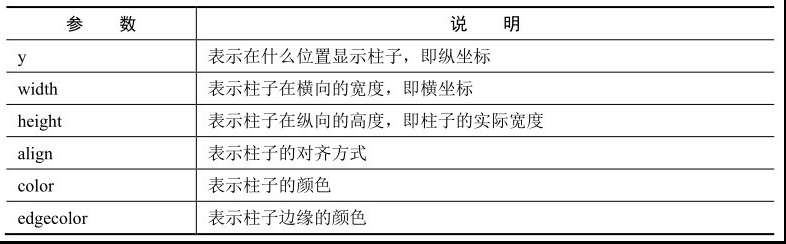





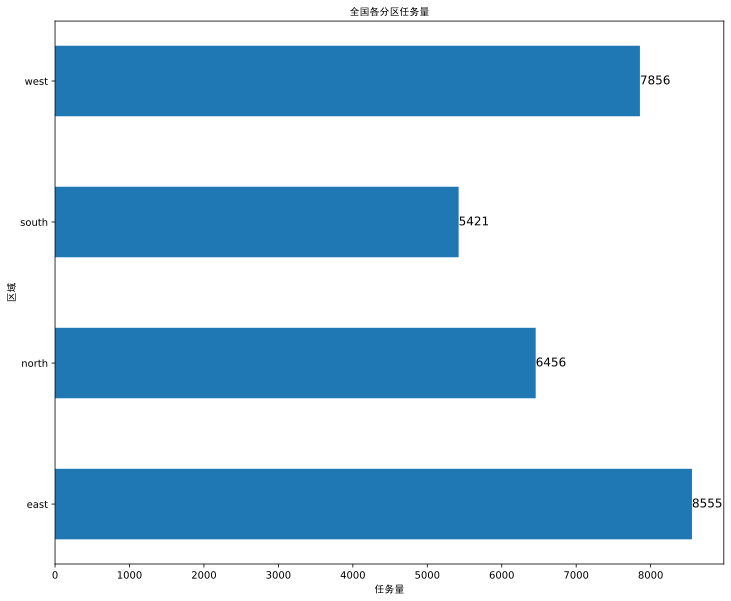

In [ ]:
# 建立坐标系
fig, axes = plt.subplots(1,1, figsize=(12,10))

# 指明 x 和 y 值
x = np.array(['east', 'north', 'south', 'west'])
y = np.array([8555, 6456, 5421, 7856])

# 绘图
# width指明条形图的宽度， align指明条形图的位置，可以选edge,默认是center
axes.barh(x, height = 0.5, width = y, align = 'center')

# 设置标题
axes.set_title(u'全国各分区任务量', fontproperties=zhfont, loc = 'center')

# 添加数据标签
for a, b in zip(x, y):
  axes.text(b, a, b, ha = 'left', va = 'center', fontsize = 12)

# 设置 x 轴和 y 轴的名称
axes.set_ylabel(u'区域', fontproperties = zhfont)
axes.set_xlabel(u'任务量', fontproperties = zhfont)

# 设置网格线
axes.grid(False)

# 保存到本地

plt.savefig("/content/drive/MyDrive/BESTROE/数据/barh.jpg",dpi=400)

## 4.绘制散点图

- 散点图常用来发现各变量之间的相关关系
- 使用的是plt库中的**scatter**方法。

**scatter语法**



```
plt.scatter(x, y, s, c, marker, linewidths, edgecolors)
```
**参数解析**

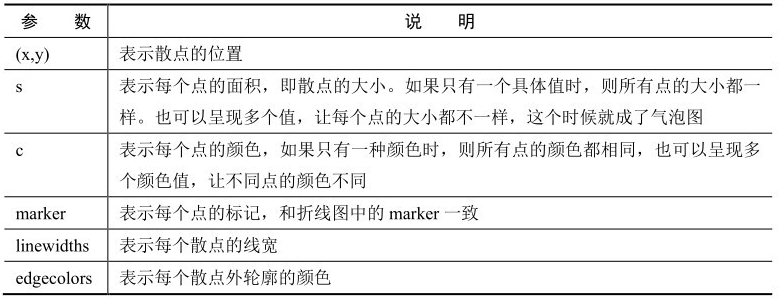



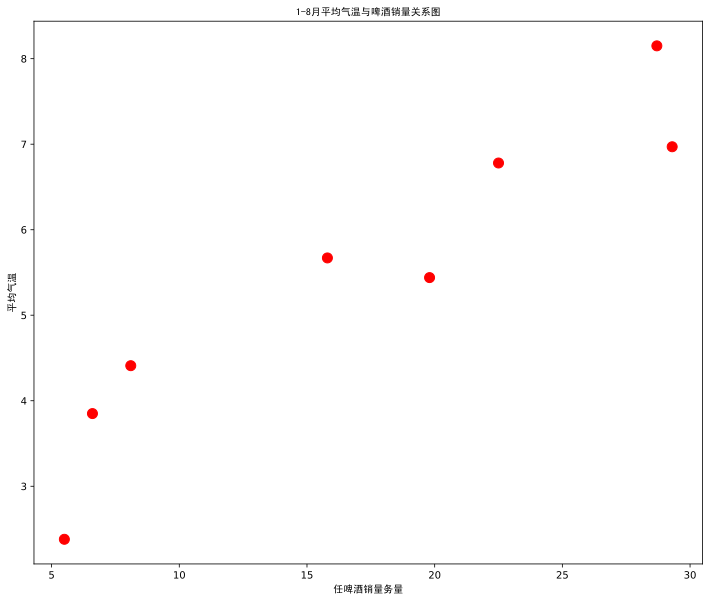

In [ ]:
# 绘制1—8月平均气温与啤酒销量关系的散点图
# 建立坐标系
fig, axes = plt.subplots(1,1, figsize=(12,10))

# 指明 x 和 y 值
x = np.array([5.5,6.6,8.1,15.8,19.8,22.5,28.7,29.3])
y = np.array([2.38, 3.85, 4.41, 5.67, 5.44, 6.78, 8.15, 6.97])

# 绘图
axes.scatter(x, y, marker="o", s = 100, c ="red")

# 设置标题
axes.set_title(u"1-8月平均气温与啤酒销量关系图", fontproperties=zhfont)

# 设置 x 轴和 y 轴的名称
axes.set_ylabel(u'平均气温', fontproperties = zhfont)
axes.set_xlabel(u'任啤酒销量务量', fontproperties = zhfont)

# 设置网格线
axes.grid(False)

# 保存本地
plt.savefig("/content/drive/MyDrive/BESTROE/数据/scatter.jpg",dpi=400)

## 5.绘制气泡图

- 气泡图与散点图类似，散点图中各点的大小一致，气泡图中各点的大小不一致

- 使用的方法同样是plt库中的scatter方法，只需要让不同点的大小不一样即可。

**参数详解**
气泡图中的参数与散点图中的参数完全一致，故此处不再赘述。


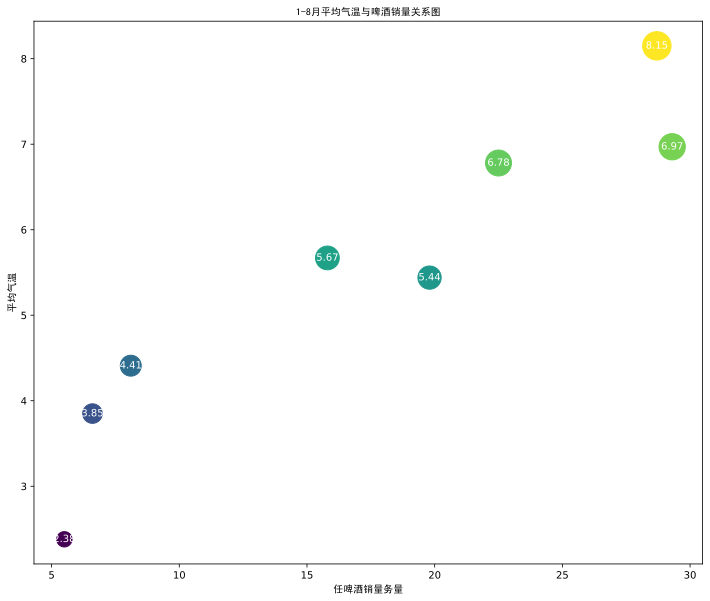

In [ ]:
# 绘制1—8月平均气温与啤酒销量关系的散点图
# 建立坐标系
fig, axes = plt.subplots(1,1, figsize=(12,10))

# 指明 x 和 y 值
x = np.array([5.5,6.6,8.1,15.8,19.8,22.5,28.7,29.3])
y = np.array([2.38, 3.85, 4.41, 5.67, 5.44, 6.78, 8.15, 6.97])

# 绘图
colors = y*10 # 根据y值得大小生成不同得颜色
area = y*100 # 根据y值得大小生成大小不同得形状
axes.scatter(x, y, marker="o", s = area, c = colors)

# 设置标题
axes.set_title(u"1-8月平均气温与啤酒销量关系图", fontproperties=zhfont)

# 添加数据标签
for a, b in zip(x,y):
  axes.text(a, b, b, ha ='center', va= 'center', fontsize = 10, color="white")

# 设置 x 轴和 y 轴的名称
axes.set_ylabel(u'平均气温', fontproperties = zhfont)
axes.set_xlabel(u'任啤酒销量务量', fontproperties = zhfont)

# 设置网格线
axes.grid(False)

# 保存本地
plt.savefig("/content/drive/MyDrive/BESTROE/数据/babble.jpg",dpi=400)

## 6.绘制面积图

- 面积图是与折线图类似的一种图形，

- 使用的是plt库中的stackplot方法

**stackplot语法**



```
plt.stackplot(x,y, labels, colors)
```
**参数说明**

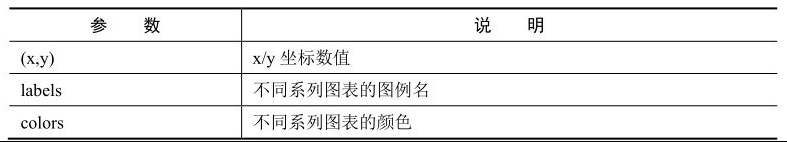






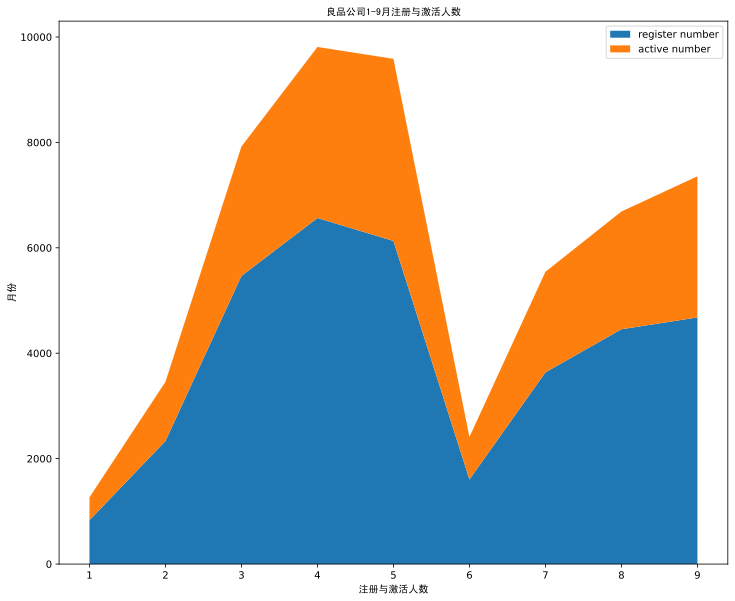

In [ ]:
# 绘制良品公司1-9月份注册与激活人数得面积图
# 绘制1—8月平均气温与啤酒销量关系的散点图
# 建立坐标系
fig, axes = plt.subplots(1,1, figsize=(12,10))

# 指明 x 和 y 值
x = np.array([1,2,3,4,5,6,7,8,9])
y1 = np.array([833, 2335, 5467, 6565, 6129, 1605, 3637, 4455, 4679])
y2 = np.array([433, 1123, 2456, 3245, 3456, 806, 1908, 2234, 2678])

# 绘图
# 指明系列标签
labels = ['register number', 'active number']
axes.stackplot(x, y1, y2, labels=labels)

# 设置标题
axes.set_title(u"良品公司1-9月注册与激活人数", fontproperties=zhfont, loc="center")


# 设置 x 轴和 y 轴的名称
axes.set_ylabel(u'月份', fontproperties = zhfont)
axes.set_xlabel(u'注册与激活人数', fontproperties = zhfont)

# 设置网格线
axes.grid(False)

# 显示图例
plt.legend()

# 保存本地
plt.savefig("/content/drive/MyDrive/BESTROE/数据/stackplot.jpg",dpi=400)

## 7.绘制树地图

- 树地图常用来表示同一等级中不同类别的占比关系，使用的是**squarify库**，

- 在使用这个库以前先安装一下，安装方法是**pip install squarify。**

**squarify语法**



```
# squarify.plot(sizes, label, color, value, edgecolor, linewidth)
```

**参数讲解**

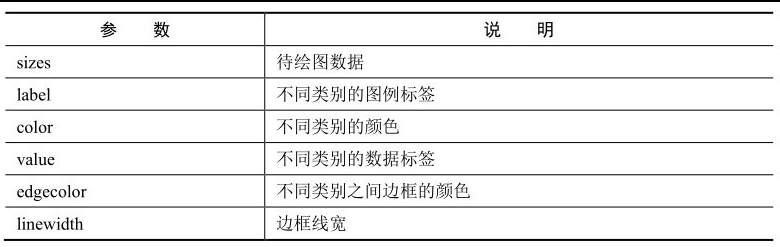







In [ ]:
# 绘制菊粉星座分布的树地图
!pip3 install squarify

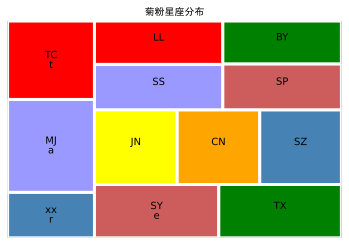

In [ ]:
import squarify

# 指定每一块得大小
size = np.array([0.34, 0.693, 0.585, 0.570, 0.562, 0.531,
                 0.530, 0.524, 0.501, 0.478, 0.468, 0.436])

# 指定每一块得文字标签
xingzuo = np.array(['xx','MJ', 'TC', 'SY', 'TX', 'JN', 'CN', 'SZ', 'SS', 'LL', 'SP', 'BY'])

# 指定每一块得数值标签
rate = np.array(['34%', '6.93%', '5.85%', '5.70%', '5.62%', '5.31%', '5.30%', '5.24%', '5.01%',
                 '4.78%', '4.68%', '4.36%'])

# 指定每一块得颜色
colors = ['steelblue', '#9999ff', 'red', 'indianred', 'green', 'yellow', 'orange']

# 绘图
plot = squarify.plot(sizes = size,
                     label = xingzuo,
                     color = colors,
                     value = 'rate',
                     edgecolor = 'white',
                     linewidth = 3)

# 设置标题大小
plt.title(u'菊粉星座分布', fontproperties=zhfont, fontdict={'fontsize': 12})

# 去除坐标轴
plt.axis('off')

# 去除上边框和有边框得刻度
plt.tick_params(top = 'off', right = 'off')

# 保存本地
plt.savefig("/content/drive/MyDrive/BESTROE/数据/squarify.jpg",dpi=400)


## 8.绘制雷达图

- 雷达图常用来综合评价某一事物，它可以直观地看出该事物的优势与不足。
- 雷达图使用的是plt库中的polar方法，polar是用来建立极坐标系的，其实雷达图就是先将各点展示在极坐标系中，然后用线将各点连接起来。

**polar语法**


```
plt.polar(theta, r, color, marker, linewidth)
```

**参数说明**
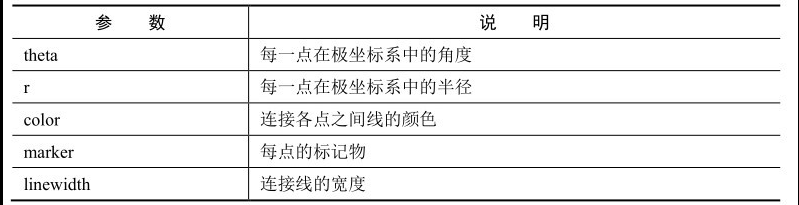




绘制吴泳帅在某局王者游戏当中的综合评价雷达图

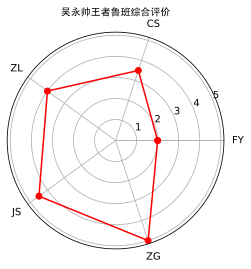

In [ ]:
# 建立坐标系
# 参数polar为True表示建立一个极坐标系
plt.subplot(111, polar = True)

# 把圆分成5份
data_length = 5

# np.linspace表示在指定的间隔内返回均匀间隔的数字
angles = np.linspace(0, 2*np.pi, data_length, endpoint = False)

labels = ["FY", 'CS', 'ZL', 'JS', 'ZG']
data = [2, 3.5, 4, 4.5, 5]

data = np.concatenate((data, [data[0]])) #闭合
angles = np.concatenate((angles, [angles[0]])) #闭合

# 绘图
plt.polar(angles, data, color = 'r', marker = 'o')

# 设置x轴的刻度
plt.xticks(angles, labels)

# 设置标题
plt.title(u'吴永帅王者鲁班综合评价', fontproperties=zhfont)

# 保存本地
plt.savefig("/content/drive/MyDrive/BESTROE/数据/polar.jpg",dpi=400)



## 9.绘制箱型图

- 箱形图用来反映一组数据离散情况
- 它使用的是plt库中的boxplot方法。

**boxplot方法**


```
# plt.boxplot(x, vert, widths, labels)
```

**参数说明**
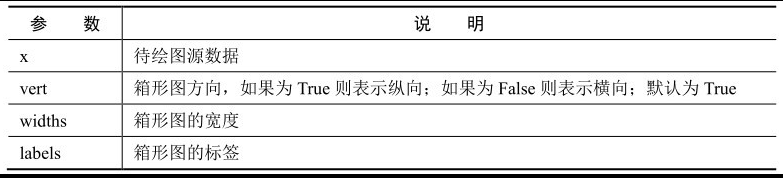



绘制×××公司1—9月注册与激活人数的箱形图

[array([ 833, 2335, 5467, 6565, 6129, 1605, 3637, 4455, 4679]), array([ 433, 1123, 2456, 3245, 3456,  806, 1908, 2234, 2678])]


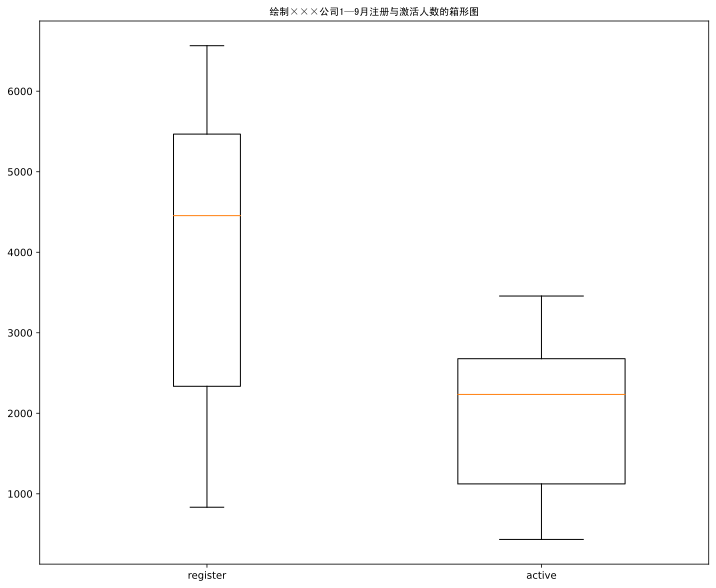

In [ ]:
# 建立坐标系
fig, axes = plt.subplots(1,1, figsize=(12,10))

# 指明X的值
y1 = np.array([833, 2335, 5467, 6565, 6129, 1605, 3637, 4455, 4679])
y2 = np.array([433, 1123, 2456, 3245, 3456, 806, 1908, 2234, 2678])
x =[y1, y2]

print(x)
# 绘图
labels = ['register', 'active']
axes.boxplot(x, labels = labels, vert = True, widths = [0.2, 0.5])

# 设置标题
axes.set_title(u'绘制×××公司1—9月注册与激活人数的箱形图', fontproperties=zhfont)

# 去掉网格线
axes.grid(False)
# 保存本地
plt.savefig("/content/drive/MyDrive/BESTROE/数据/boxplot.jpg",dpi=400)

## 10.绘制饼图

- 饼图也常用来表示同一等级中不同类别的占比情况
- 使用的方法是plt库中的pie方法。

**pie语法**



```
plt.pie(x, explode, labels, colors, autopct, pctdistance, shadow, labeldictance, startangle, radius, counterclock, wedgeprops, textprops, center, frame)
```

**pie参数说明**
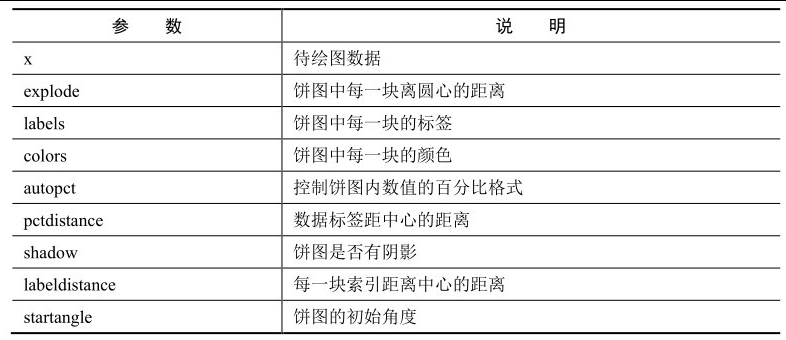




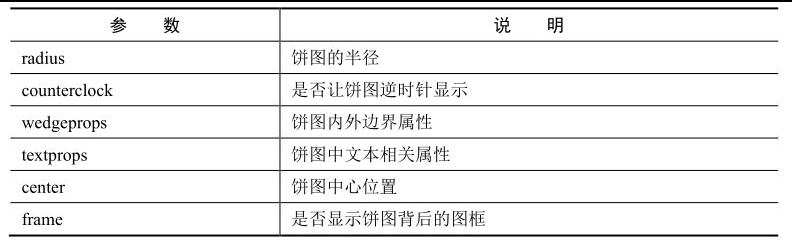

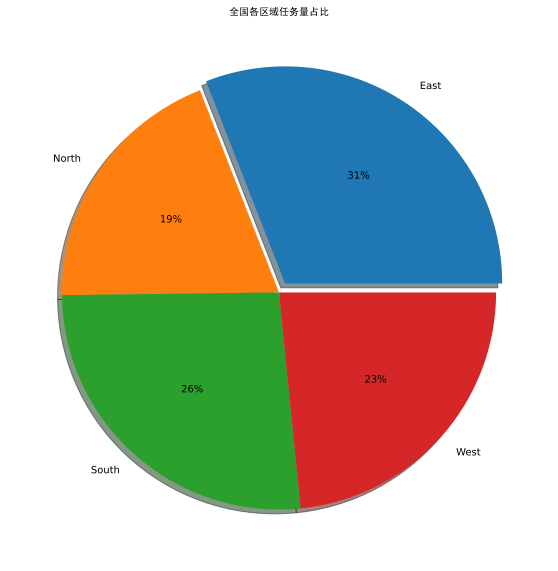

In [ ]:
# 绘制全国各区域任务量占比的饼图
# 建立坐标系
fig, axes = plt.subplots(1,1, figsize=(12,10))

# 指明X的值
x = np.array([8566, 5335, 7310, 6482])

# 指定labels
labels = ['East', 'North', 'South', 'West']

#让第一块离圆心的距离远一点
explode = [0.05, 0, 0, 0]

labeldistance = 1.1

axes.pie(x, labels=labels, autopct='%.0f%%', shadow= True,
         explode = explode, radius=1.0,
         labeldistance=labeldistance)

# 设置标题
axes.set_title(u'全国各区域任务量占比', fontproperties=zhfont)

# 去掉网格线
axes.grid(False)
# 保存本地
plt.savefig("/content/drive/MyDrive/BESTROE/数据/pie.jpg",dpi=400)


## 11.绘制圆环图

- 圆环图是与饼图类似的一种图表，常用来表示同一层级不同类别之间的占比关系，使用的也是plt库中的pie方法。

- 圆环图的参数与饼图的参数完全一致。

- 在饼图的基础上调整wedgeprops参数即可实现圆环图。

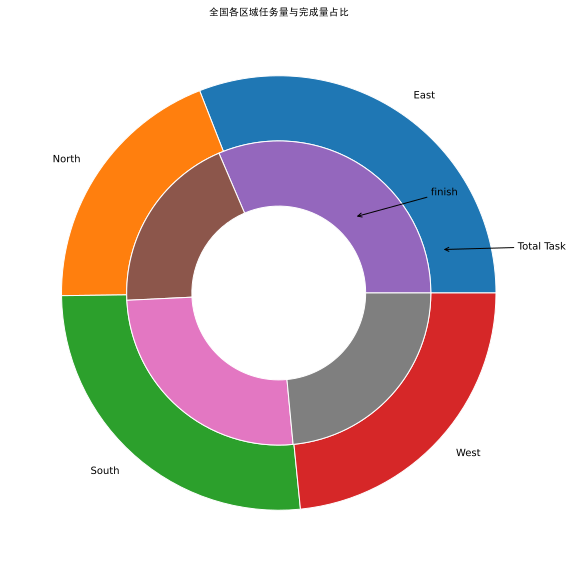

In [ ]:
# 绘制全国各区域任务量占比的饼图
# 建立坐标系
fig, axes = plt.subplots(1,1, figsize=(12,10))

# 指明X的值
x1 = np.array([8566, 5335, 7310, 6482])
x2 = np.array([4355, 2678, 3566, 3255])

# 指定labels
labels = ['East', 'North', 'South', 'West']

axes.pie(x1, labels=labels, radius=1.0, wedgeprops=dict(width=0.3, edgecolor='w'))
axes.pie(x2, radius=0.7, wedgeprops=dict(width=0.3, edgecolor='w'))

# 添加注释
axes.annotate("finish", xy = (0.35, 0.35), xytext= (0.7, 0.45),
              arrowprops=dict(facecolor='black', arrowstyle='->'))
axes.annotate("Total Task", xy = (0.75, 0.20), xytext= (1.1, 0.2),
              arrowprops=dict(facecolor='black', arrowstyle='->'))

# 设置标题
axes.set_title(u'全国各区域任务量与完成量占比', fontproperties=zhfont, loc='center')

# 去掉网格线
axes.grid(False)
# 保存本地
plt.savefig("/content/drive/MyDrive/BESTROE/数据/pie_cicle.jpg",dpi=400)


## 12.绘制热力图

- 热力图是将某一事物的响应度反映在图表上，可以快速发现需重点关注的区域
- 使用的是plt库中的imshow方法。

**imshow方法**



```
plt.imshow(x, cmap)
```

**参数讲解**

- x:表示待绘图的数据，需要矩阵形式
- cmap: 配色方案
- cmap的所有可选值都封装在plt.cm里，在Jupyter Notebook中输入plt.cm.然后按Tab键就可以看到，如下图所示。





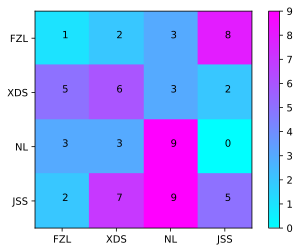

In [ ]:
import itertools
# 几个相关指标之间的相关性
x = np.array([[1,2,3,8],
        [5,6,3,2],
        [3,3,9,0],
        [2,7,9,5]])

# 设置配色方案
cmap = plt.cm.cool
plt.imshow(x, cmap=cmap)

# 显示颜色条
plt.colorbar()

# 设置x轴和y轴的刻度标签
classes = ['FZL','XDS','NL','JSS']
tick_masks = np.arange(len(classes))
plt.xticks(tick_masks, classes)
plt.yticks(tick_masks, classes)

# 将数值显示在指定位置
for i,j in itertools.product(range(x.shape[0]),range(x.shape[1])):
  plt.text(j, i, x[i,j])


# 去掉网格线
axes.grid(False)
# 保存本地
plt.savefig("/content/drive/MyDrive/BESTROE/数据/cmap.jpg",dpi=400)

## 13.绘制水平线和垂直线

水平线和垂直线主要用来做对比参考，它们使用的是plt库中的axhline和axvline方法。



```
- plt.axhline(y, xmin, xmax)
- plt.axvline(x, ymin, ymax)
```

